In [1]:
%matplotlib inline
#%matplotlib notebook
import numpy as np
import scipy.interpolate
import matplotlib.pylab as plt

In [2]:
# data from Jalal
pressure = np.array([53796.17738978, 53763.78283658, 53615.81511987, 53372.11256106,
       53034.32477414, 52603.86379805, 52082.69606698, 51473.12231546,
       50777.70554956, 49999.09955498, 49139.82165977, 48202.00215914,
       47187.12266569, 46095.54356973, 44926.18618741, 43666.78174149,
       42364.54222268, 41123.04189642, 40006.18026133, 38981.50840369,
       38020.55591329, 37106.88540989, 36229.73930092, 35381.62197992,
       34556.92363387, 33751.12054464, 32960.23682403, 32180.44432254,
       31407.54297316, 30636.20678862, 29858.52132069, 29060.8164754 ,
       28215.35127388, 27155.38457531, 25633.57868108, 24042.65868455,
       23054.1203172 , 22335.90603729, 21729.27687759, 21185.99838726,
       20686.30367608, 20218.92866473, 19776.9248825 , 19355.68593939,
       18951.99415122, 18563.51875091, 18188.51657881, 17825.67539592,
       17474.23341307, 17129.53411678, 16786.83935742, 16445.30962591,
       16105.33765922, 15767.03087751, 15430.45701004, 15095.65223185,
       14762.62825622, 14431.37687576, 14101.87069676, 13773.67496624,
       13449.04929103, 13136.80135538, 12843.26571255, 12567.0138449 ,
       12305.52638283, 12056.96707803, 11819.86547153, 11593.02235644,
       11375.44262383, 11166.37374186, 10964.74250644, 10766.3282225 ,
       10564.0794804 , 10354.24385617, 10136.46994443,  9910.10926957,
        9674.40741277,  9428.478197  ,  9171.27097303,  8901.20244062,
        8619.0512406 ,  8332.08203119,  8046.74967675,  7764.05304587,
        7483.79357626,  7205.91873306,  6930.36195407,  6657.04016112,
        6385.94342065,  6114.49629409,  5837.05190392,  5550.23865282,
        5253.12813279,  4944.68245465,  4623.71529382,  4288.84952638,
        3938.15109287,  3574.54196496,  3207.93843734,  2841.48674023,
        2471.68753907])

rho = np.array([0.        , 0.00610806, 0.01221648, 0.01832562, 0.02443582,
       0.0305474 , 0.03666064, 0.04277579, 0.04889307, 0.05501267,
       0.06113477, 0.06725959, 0.07338734, 0.07951826, 0.08565262,
       0.0917907 , 0.09793277, 0.1040791 , 0.11022999, 0.11638573,
       0.12254668, 0.12871321, 0.13488572, 0.14106466, 0.14725054,
       0.15344393, 0.15964548, 0.16585591, 0.172076  , 0.17830657,
       0.18454852, 0.19080292, 0.19707104, 0.20335415, 0.20965338,
       0.21596968, 0.22230393, 0.22865712, 0.23503032, 0.24142468,
       0.24784135, 0.25428136, 0.26074563, 0.26723499, 0.27375017,
       0.28029172, 0.28686005, 0.29345544, 0.30007806, 0.30672784,
       0.31340456, 0.32010795, 0.32683764, 0.33359317, 0.34037402,
       0.34717964, 0.35400955, 0.36086327, 0.36774039, 0.3746405 ,
       0.38156316, 0.38850796, 0.39547454, 0.40246261, 0.40947189,
       0.41650214, 0.42355318, 0.43062487, 0.43771715, 0.44483001,
       0.45196346, 0.45911754, 0.46629242, 0.47348838, 0.48070575,
       0.48794487, 0.49520616, 0.50249014, 0.50979745, 0.51712884,
       0.52448509, 0.5318671 , 0.53927602, 0.54671325, 0.55418039,
       0.56167925, 0.56921201, 0.57678131, 0.58439028, 0.59204236,
       0.59974143, 0.60749209, 0.61529956, 0.62316942, 0.63110753,
       0.63911994, 0.64721309, 0.6553936 , 0.66366716, 0.67203833,
       0.68051188])

# switch to rho_tor_norm
rho = rho/rho[-1]

In [3]:
# mirror the pressure around rho=0 to force the derivative on axis to be zero
rho_x = np.concatenate((-rho[-1:0:-1],rho))
pressure_x = np.concatenate((pressure[-1:0:-1], pressure))

In [4]:
# find a smoothing spline
x,y,p = scipy.interpolate.splrep(rho_x, pressure_x, 1.0/(pressure_x/10), task=0, s=5)
print(x.shape, y.shape, p)
print(x)
print(y)

(16,) (16,) 3
[-1.         -1.         -1.         -1.         -0.71702623 -0.46054238
 -0.33600754 -0.2254831   0.          0.2254831   0.34537284  0.46054238
  1.          1.          1.          1.        ]
[ 2474.52383181  5349.38642236  9852.16911902 14275.22689987
 21599.77202136 37401.65655984 63009.65867512 36985.98949835
 21193.79538441 10770.3435654   8409.85256165  2426.38443466
     0.             0.             0.             0.        ]


In [5]:
# evaluate the smoothing spline at 5 points and fit an interpolating spline with appropriate b.c.
X = np.linspace(0,1,5)
Y = scipy.interpolate.splev(X, (x,y,p))
S = scipy.interpolate.make_interp_spline(X, Y, bc_type=([(1, 0.0)], [(2, 0.0)]))

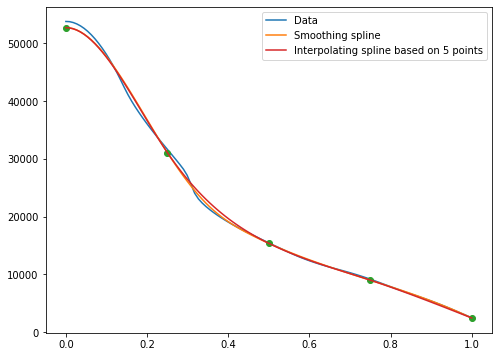

In [6]:
# plot the data, smoothing spline, 5 points and interpolating spline
plt.figure(figsize=(8,6))
plt.plot(rho, pressure, label='Data')
plt.plot(rho, scipy.interpolate.splev(rho, (x,y,p)), label='Smoothing spline')
plt.plot(X, Y, 'o')
plt.plot(rho, S(rho), label='Interpolating spline based on %s points' % (X.shape[0]))
plt.legend(loc=0)

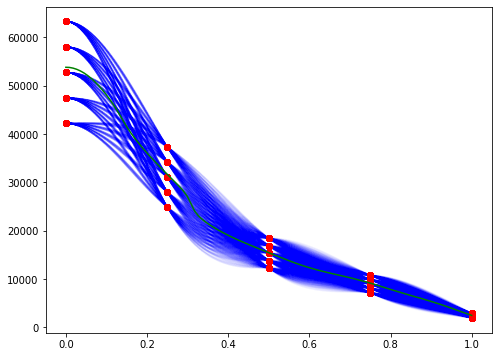

In [7]:
# Vary points around the reference value, recalculate the interpolating spline and plot
R = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
plt.figure(figsize=(8,6))
for r in np.stack(np.meshgrid(R, R, R, R, R), -1).reshape(-1, 5):
    plt.plot(X, Y*r, 'ro')
    S = scipy.interpolate.make_interp_spline(X, Y*r, bc_type=([(1, 0.0)], [(2, 0.0)]))
    plt.plot(rho, S(rho), 'b-', alpha=0.01)
plt.plot(rho, pressure, 'g-')